# Desafío - Dimensionalidad y Agrupación (I)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!pip install factor_analyzer

## Contexto
Para esta actividad utilizaremos un subconjunto de 25 items de la International Personality Item Pool, aplicados a 2800 individuos. El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características:
- Amabilidad
- Escrupulosidad
- Extroversión
- Neuroticismo
- Apertura

Los individuos deben responder qué tan adecuada es la oración respecto a supersonalidad en base a 6 categorías:
- 1: No me representa para nada
- 2: No me representa.
- 3: Algunas cosas no me representan.
- 4: Algunas cosas me representan.
- 5: Me representa.
- 6: Me representa completamente.

Las 25 preguntas son:

- A1: Soy indiferente a los sentimientos de otros.
- A2: Me preocupo del bienestar de otros.
- A3: Sé cómo confortar a otros.
- A4: Me agradan los niños.
- A5: Hago sentir tranquila a la gente.
- C1: Soy exacto en mi trabajo.
- C2: Sigo con mis tareas hasta que todo esté perfecto.
- C3: Hago cosas siguiendo un plan.
- C4: Hago cosas con el mínimo esfuerzo.
- C5: Pierdo mi tiempo.
- E1: No hablo mucho con las personas.
- E2: Me es difícil acercarme a otros.
- E3: Sé cómo cautivar gente.
- E4: Hago amigos de forma fácil.
- E5: Puedo tomar el cargo de las cosas.
- N1: Me enojo con facilidad.
- N2: Me irrito con facilidad.
- N3: Tengo cambios de humor frecuentes.
- N4: Usualmente me siento melancólico.
- N5: Entró en pánico con facilidad.
- O1: Estoy lleno de ideas.
- O2: Evito leer material difícil.
- O3: Tiendo a llevar la conversación a niveles más altos.
- O4: Dedico tiempo a la reflexión de cosas.
- O5: No profundizaré sobre una materia específica.

Seregistraron una seriede covariables sobre características demográficas de los encuestados:
- gender: 
    - Hombre = 1
    - Mujer  = 2


- education:
    - 1 = Educación Media Incompleta
    - 2 = Educación Media Completa
    - 3 = Educación Universitaria Incompleta
    - 4 = Educación Universitaria Completa
    - 5 = Estudios de Postgrado


- age: Edad en Años.


Implementaremos un modelo de extracción factorial para identificar los principales perfiles psicológicos.

## Desafío 1: Lectura de archivos

- Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
- Importe la base de datos <code>bfi.csv</code> y asígnela a un objeto df.
- Solicite las primeras 5 observaciones con head.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Librerías de analisis factorial y PCA
import factor_analyzer as fact
from sklearn.decomposition import PCA
import missingno as mgno

path_colab  = "/content/drive/MyDrive/Data Scientist/Desafío Latam/2 .-Fundamentos Data Science/7.- Dimensionalidad/Desafios/bfi.csv"
path_casita = "bfi.csv"

df = pd.read_csv(path_casita)
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Desafío 2: Preprocesamiento

- Elimine las columnas redundantes de la base, tal como 'Unnamed: 0'.
- Analice el patrón de datos perdidos con missingno. Comente cuáles son las principales variables con mayores tasas de valores perdidos.
- Genere un nuevo objeto donde almacenará la base sin valores perdidos.


In [4]:
df = df.drop(columns = 'Unnamed: 0')

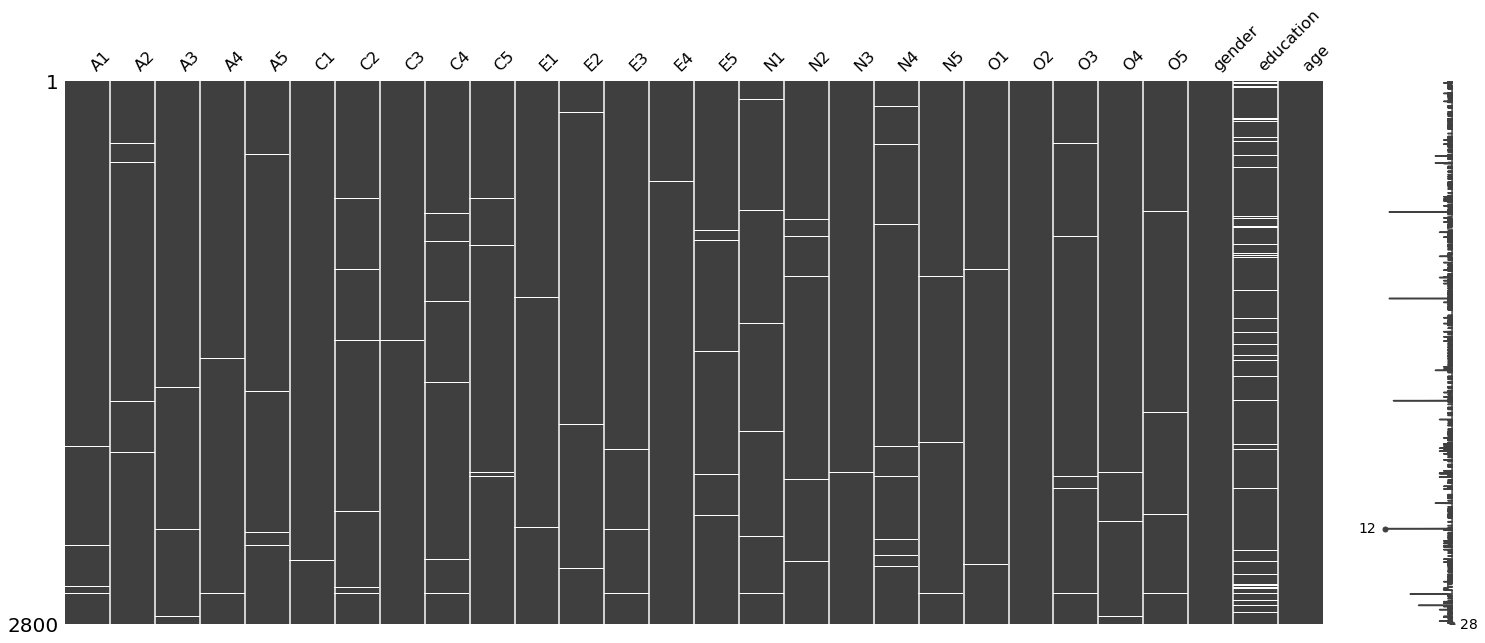

In [5]:
mgno.matrix(df)

**Comentarios:**

Muy notoriamente la variable con más valores perdidos es "education", pero en general las primeras 5 variables con mayor cantidad de casos perdidos son las siguientes:

In [6]:
df.isnull().sum().sort_values(ascending = False).head()

education    223
N4            36
N5            29
O3            28
A2            27
dtype: int64

In [7]:
df = df.dropna().reset_index(drop = True)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,2.0,1.0,6.0,5.0,6.0,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
1,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,3.0,6.0,4.0,2.0,1.0,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
2,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
3,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,3.0,4.0,3.0,6.0,5.0,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
4,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,2.0,1.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68


AxesSubplot(0.125,0.125;0.698618x0.755)
El nuevo shape del dataframe es (2236, 28)


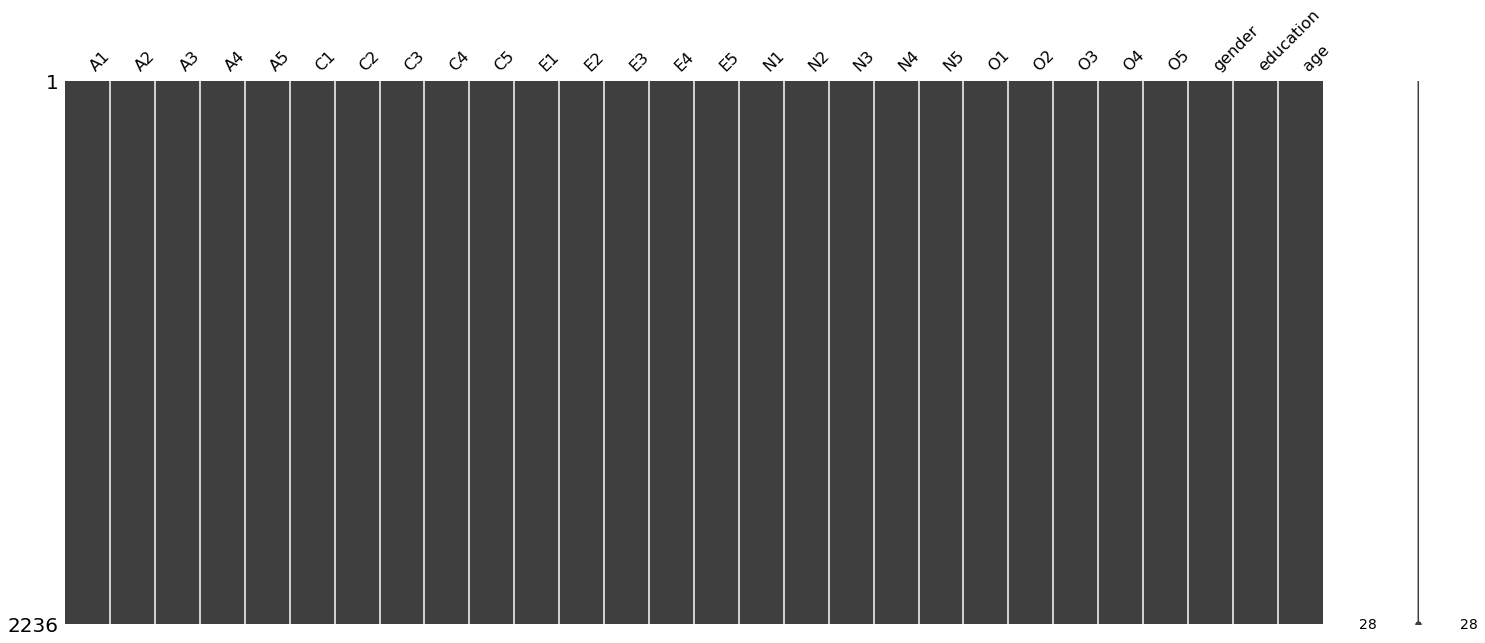

In [8]:
print(mgno.matrix(df))
print(f"El nuevo shape del dataframe es {df.shape}")

## Desafío 3: Descripción

- Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
- Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr con un dotplot.
- Genere una matriz de correlaciones con este nuevo objeto y visualícelo con heatmap.
- Comente sobre los principales patrones de correlación entre las preguntas de la batería.

In [9]:
df3 = df.copy().loc[:,:'O5']
df3

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,2.0,1.0,6.0,5.0,6.0,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0
1,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,3.0,6.0,4.0,2.0,1.0,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0
2,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0
3,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,3.0,4.0,3.0,6.0,5.0,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0
4,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,2.0,1.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,5.0,5.0,5.0,6.0,5.0,6.0,6.0,2.0,4.0,5.0,5.0,1.0,5.0,6.0,4.0,5.0,4.0,5.0,3.0,4.0,4.0,5,5.0,4.0,4.0
2232,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,3.0,5.0,2.0,3.0,1.0,5.0,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0
2233,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2234,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [10]:
df3b = pd.DataFrame(df3.mean(), columns = ['media por pregunta'])
df3b

,media por pregunta
A1,2.365385
A2,4.834079
A3,4.629249
A4,4.749553
A5,4.584973
C1,4.569767
C2,4.401163
C3,4.322898
C4,2.500894
C5,3.255367


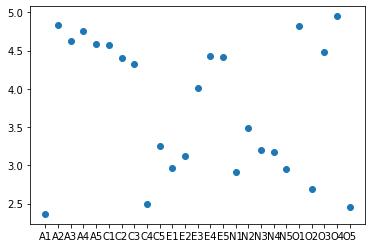

In [11]:
plt.scatter(x = df3b.index, y = df3b.values)

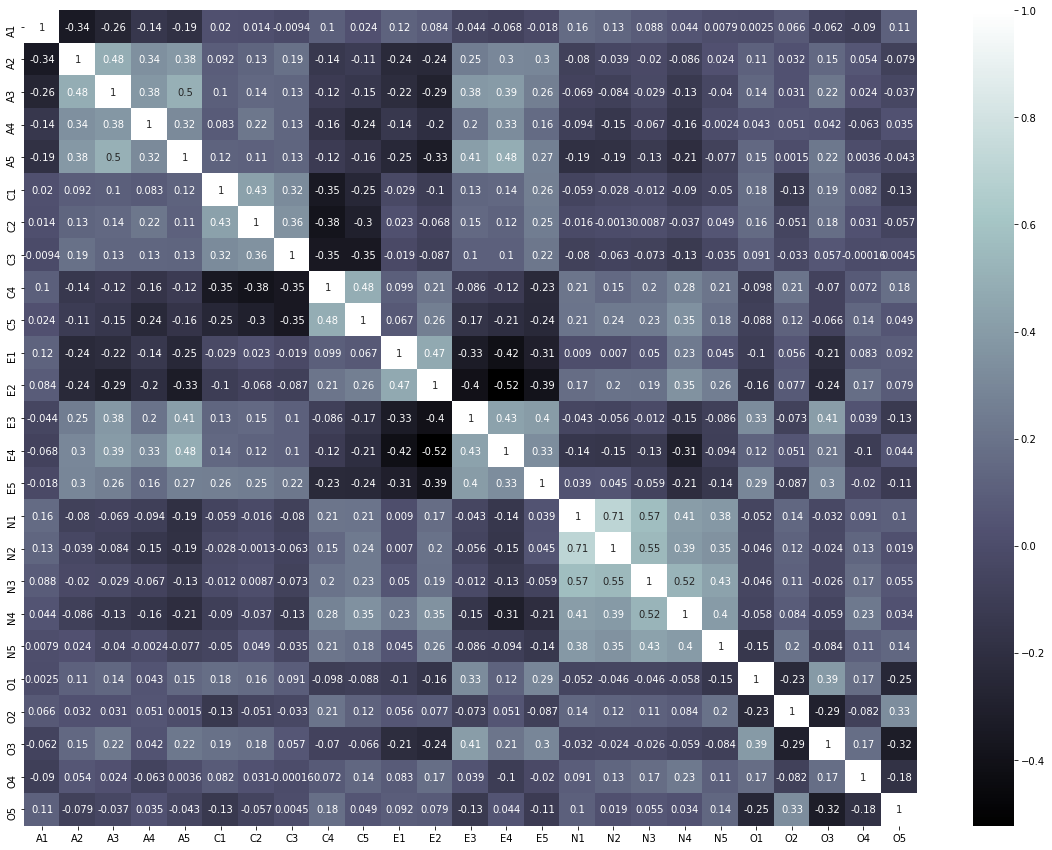

In [12]:
plt.rcParams["figure.figsize"] = (20,15)
sns.heatmap(df3.corr(), annot= True, cmap='bone')

In [13]:
from sklearn.preprocessing import LabelEncoder #Lo usaremos para generar un dataframe que se ordene por el |correlación|, pero de igual forma podamos saber el signo de la correlación

label_encoder = LabelEncoder() #Instanceamos el codificador
df3['A1'] = label_encoder.fit_transform(df['A1']) #fiteamos una columna al azar
  
corr_mat = df3.corr(method='pearson') #generamos la matriz de correlación
  
upper_corr_mat = corr_mat.where( 
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool)) #Para no tener duplicados, seleccionamos solo el triángulo superior de la matriz de correlación (podría haber sido el inferior)
  
unique_corr_pairs = upper_corr_mat.unstack().dropna() #unstackeamos los indices y dropeamos los 'NaN' para quedarnos con el triangulo superior limpio
  
df_final = pd.DataFrame(unique_corr_pairs.reset_index().rename(columns = {'level_0':'Var1','level_1':'Var2',0:'corr'})) #Creamos el dataframe con los datos para verlos más ordenados
df_final['abscorr'] = abs(df_final['corr']) #creamos la columna con |corr|
df_final.sort_values(by = 'abscorr', ascending = False).head(10)  #ordenamos por la misma en orden descendente y mostramos las primeras 10 líneas de este.

,Var1,Var2,corr,abscorr
135,N2,N1,0.711571,0.711571
151,N3,N1,0.565886,0.565886
152,N3,N2,0.547733,0.547733
89,E4,E2,-0.523416,0.523416
170,N4,N3,0.519055,0.519055
8,A5,A3,0.502886,0.502886
82,E4,A5,0.484856,0.484856
2,A3,A2,0.484847,0.484847
44,C5,C4,0.484126,0.484126
65,E2,E1,0.465697,0.465697


**Comentarios**

Tal como se puede ver en el dataframe del output anterior, los 5 pares de variables distintas más correlacionados son:

    1) N2-N1: "N1: Me enojo con facilidad" con "N2: Me irrito con facilidad" es lógico que tenga alta correlación directa
    2) N3-N1: "N3: Tengo cambios de humor frecuentes" con "N1: Me enojo con facilidad" también es lógico que tenga alta correlación directa.
    3) N3-N2: "N3: Tengo cambios de humor frecuentes" con "N2: Me irrito con facilidad" también es lógico que tenga alta correlación directa.
    4) E4-E2: "E2: Me es difícil acercarme a otros" con "E4: Hago amigos de forma fácil" también es lógica que tenga alta correlación inversa (y no directa).
    5) N4-N3: "N4: Usualmente me siento melancólico" con "N3: Tengo cambios de humor frecuentes" también es lógico (menos que las otras pero de igual forma) que tenga alta correlación directa.

## Desafío 4: Extracción de factores

## i) Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.


In [14]:
fact.calculate_bartlett_sphericity(df3)

(16509.673550497195, 0.0)

**Comentarios**

Dado que el valor p de la prueba de esfericidad de Barlett es 0.0, estaríamos en condiciones de decir que decir que la matriz de correlación NO es una matriz de identidad, por tanto podemos seguir con el análisis de factores

In [15]:
pd.DataFrame(fact.calculate_kmo(df3)[0]).rename(columns ={0:'Puntaje KMO'}).set_index(df3.columns).sort_values(by = 'Puntaje KMO', ascending = False)

,Puntaje KMO
A5,0.900619
E5,0.894042
E3,0.893071
N4,0.886255
E2,0.883895
E4,0.878187
A3,0.871581
A4,0.870424
C5,0.861888
N5,0.860496


**Comentario**

Ningún valor de la matriz es menor a 0.7, por tanto hasta el momento no tenemos que sacar columnas de nuestra batería de preguntas

## ii) Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.

In [16]:
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,9)

factorize = fact.FactorAnalyzer(n_factors = 10).fit(df3)
ploteo = factorize.get_eigenvalues()[0]
ploteo

array([5.06851622, 2.7624793 , 2.152623  , 1.89233295, 1.51753291,
       1.07882932, 0.83090573, 0.80450025, 0.7140883 , 0.7015381 ,
       0.6808421 , 0.64897347, 0.63125633, 0.58803197, 0.5659652 ,
       0.54483958, 0.51993349, 0.49386855, 0.48273618, 0.44250032,
       0.42887063, 0.40709741, 0.38887531, 0.38476259, 0.2681008 ])

## iii) Genere un screeplot entre los eigen-values del modelo y la cantidad de dimensiones estimables.

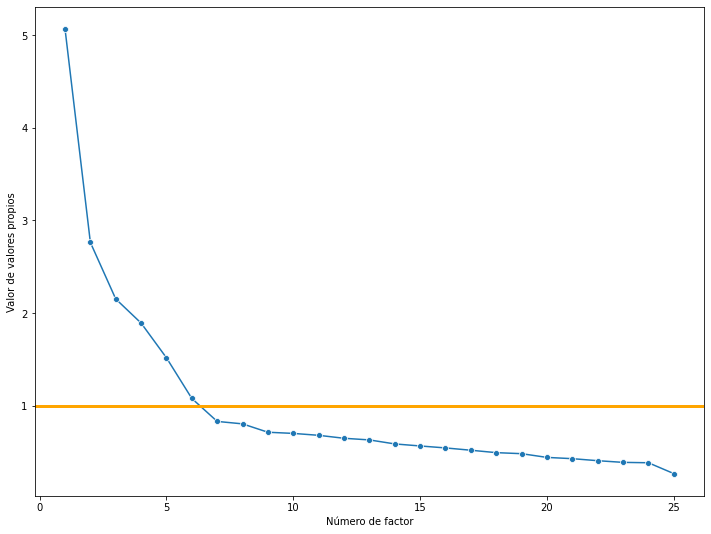

In [17]:
sns.lineplot(x = np.linspace(1,25,25), y = ploteo, style= 1, markers = True, legend = False)
plt.xlabel("Número de factor")
plt.ylabel("Valor de valores propios")
plt.axhline(y = 1, color = 'orange', linewidth = 3)

## iv) Refactoriza el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.

In [18]:
factorize_2 = fact.FactorAnalyzer(n_factors = 6).fit(df3) # Este dato de n = 6 se infiere a partir del gráfico anterior.
ploteo_2 = factorize_2.get_eigenvalues()[0]
ploteo_2

array([5.06851622, 2.7624793 , 2.152623  , 1.89233295, 1.51753291,
       1.07882932, 0.83090573, 0.80450025, 0.7140883 , 0.7015381 ,
       0.6808421 , 0.64897347, 0.63125633, 0.58803197, 0.5659652 ,
       0.54483958, 0.51993349, 0.49386855, 0.48273618, 0.44250032,
       0.42887063, 0.40709741, 0.38887531, 0.38476259, 0.2681008 ])

## v) Extraiga las cargas del modelo e identifique qué ítems están asociados a cada λ factor. Comente sobre qué significa cada factor construído.

In [19]:
pd.DataFrame(
    factorize_2.loadings_).rename(
        columns = {
            0:'Factor 1', 
            1:'Factor 2', 
            2:'Factor 3', 
            3:'Factor 4', 
            4:'Factor 5', 
            5:'Factor 6'}
            ).set_index(df3.columns).style.background_gradient(cmap='bone')

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
A1,0.044246,0.087326,0.106308,0.147752,-0.623217,0.174737
A2,0.113686,0.179650,0.058154,-0.025989,0.639541,-0.039742
A3,0.004894,0.269066,0.025713,0.020732,0.489930,0.186803
A4,-0.047633,0.129251,0.190336,0.182471,0.324844,0.060074
A5,-0.164942,0.323591,-0.013865,0.029803,0.314084,0.285151
C1,0.035324,-0.041623,0.588791,-0.138188,-0.076776,-0.002966
C2,0.081360,-0.121824,0.737840,-0.012264,-0.039509,0.038298
C3,0.015704,-0.077021,0.608281,0.055442,0.043901,-0.104278
C4,0.025907,0.020554,-0.671731,0.116555,-0.140572,0.480149
C5,0.153253,-0.087395,-0.555096,-0.065150,-0.003403,0.236204


**Comentario**

- Las preguntas de la A1 a A5 están más asociadas al factor 5
- Las preguntas de la C1 a C5 están más asociadas al factor 3
- Las preguntas de la E1 a E5 están más asociadas al factor 2
- Las preguntas de la N1 a N5 están más asociadas al factor 1
- Las preguntas de la O1 a O5 están más asociadas al factor 4

Curiosamente el factor 6 no está muy asociado a ningún grupo de preguntas

In [20]:
factor_var = factorize_2.get_factor_variance()
pd.DataFrame(factor_var).rename(
        columns = {
            0:'Factor 1', 
            1:'Factor 2', 
            2:'Factor 3', 
            3:'Factor 4', 
            4:'Factor 5', 
            5:'Factor 6'}
            )

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
0,2.761795,2.687989,2.188835,1.446168,1.370695,0.934623
1,0.110472,0.107520,0.087553,0.057847,0.054828,0.037385
2,0.110472,0.217991,0.305545,0.363391,0.418219,0.455604


**Comentario**

Con estos 6 factores, alcanzaríamos a explicar el 45,5% de la variabilidad del set de preguntas

## Desafío 5: Modelación de factores

## i) Extraiga los puntajes del modelo factorial a su base de datos.

In [21]:
extract_factor_scores = pd.DataFrame(
    factorize_2.transform(df3)).rename(
        columns = {0:'Factor 1', 1:'Factor 2', 2:'Factor 3', 3:'Factor 4', 4:'Factor 5', 5:'Factor 6'})
    
extract_factor_scores

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
0,1.279171,0.000082,1.457212,-0.345160,-0.075729,0.197519
1,-1.773292,0.848142,-1.511693,0.260017,-1.934329,-1.440113
2,0.214909,-0.170640,-0.245855,0.368303,-0.216236,-0.152767
3,-0.074288,-0.324243,0.336190,0.179723,-1.579900,-0.938596
4,0.226286,-0.880137,-1.347977,-0.325867,0.717213,-0.142786
...,...,...,...,...,...,...
2231,0.602248,0.834597,0.184898,1.169762,-0.399820,1.404198
2232,-1.558568,1.657646,-0.726490,-0.527137,-1.180325,-0.499578
2233,0.744488,-0.254111,0.728326,-1.054909,-0.899845,-0.480255
2234,0.129721,1.003899,-0.166139,-0.762935,-2.139689,-0.363081


## ii) Grafique la densidad de cada uno con kdeplot.

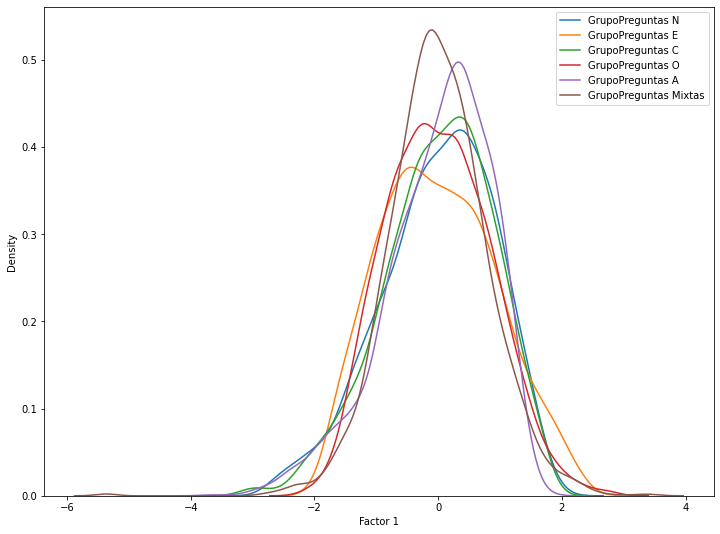

In [22]:
sns.kdeplot(extract_factor_scores.loc[:,'Factor 1'],label="GrupoPreguntas N")
sns.kdeplot(extract_factor_scores.loc[:,'Factor 2'],label="GrupoPreguntas E")
sns.kdeplot(extract_factor_scores.loc[:,'Factor 3'],label="GrupoPreguntas C")
sns.kdeplot(extract_factor_scores.loc[:,'Factor 4'],label="GrupoPreguntas O")
sns.kdeplot(extract_factor_scores.loc[:,'Factor 5'],label="GrupoPreguntas A")
sns.kdeplot(extract_factor_scores.loc[:,'Factor 6'],label="GrupoPreguntas Mixtas")
plt.legend()

## iii) Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

𝑦 = β0 + β1·𝑔𝑒𝑛𝑑𝑒𝑟 + β2·𝑒𝑑𝑢𝑐𝑎𝑡𝑖𝑜𝑛 + β1·𝑎𝑔𝑒 + ε𝑖

In [23]:
df5 = df.copy().loc[:,'gender':'age']

factorize_5 = fact.FactorAnalyzer(n_factors = 2).fit(df5)
ploteo5 = factorize_5.get_eigenvalues()[0]
ploteo5

array([1.25460524, 0.99791425, 0.74748051])

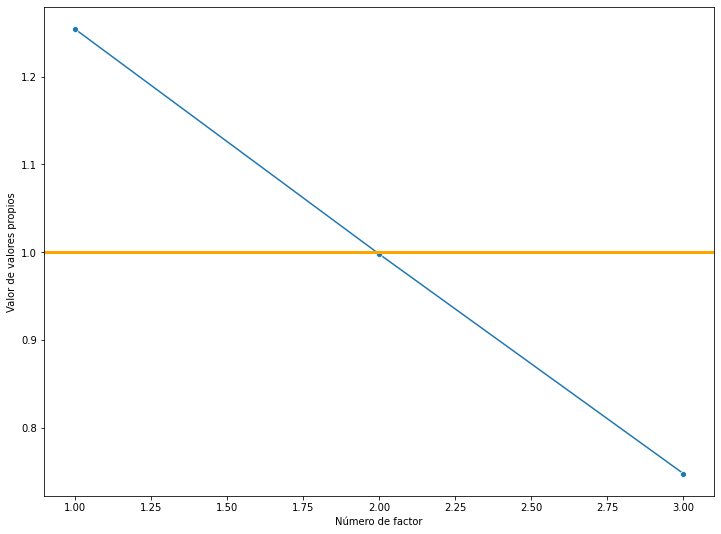

In [24]:
sns.lineplot(x = np.linspace(1,3,3), y = ploteo5, style= 1, markers = True, legend = False)
plt.xlabel("Número de factor")
plt.ylabel("Valor de valores propios")
plt.axhline(y = 1, color = 'orange', linewidth = 3)

In [25]:
pd.DataFrame(
    factorize_5.loadings_).rename(
        columns = {
            0:'Factor 1', 
            1:'Factor 2', 
            2:'Factor 3'
            }).set_index(df5.columns).style.background_gradient(cmap='bone')

,Factor 1,Factor 2
gender,-0.005347,0.204052
education,0.530301,-0.096339
age,0.483341,0.118213


**Comentario**

Según el dataframe coloreado anterior, son 2 los factores determinantes, pero principalmente el primero, el cual está asociado a las variables educación y edad, por otra parte el segundo factor explica el sexo y un poco la edad.